In [80]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import warnings

In [4]:
import string

In [5]:
import json
import itertools

In [6]:
from collections import defaultdict
import seaborn as sns

In [7]:
from collections import OrderedDict

In [8]:
import matplotlib.pyplot as plt

In [9]:
from functools import reduce

In [10]:
import functools
print = functools.partial(print, flush=True)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [12]:
import moralstrength

In [13]:
import os

In [14]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 623 kB/s eta 0:00:01    |█████████████████               | 6.4 MB 4.3 MB/s eta 0:00:02
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [15]:
import spacy
from spacy import displacy
import en_core_web_sm
import gc
import sys

In [16]:
import statistics

In [17]:
import unicodedata
import itertools

In [18]:
from moralstrength.moralstrength import estimate_morals

#### Load Morals

In [19]:
moral_list = ['authority','care', 'fairness', 'loyalty', 'purity']

In [20]:
with open('./../../../ymejova/masks/Sentiment_Moral_Lexicons/moral_dictionary.json', 'r') as fp:
    moral_dictionary = json.load(fp)

In [21]:
# fill in the missing records
for m in moral_list:
    for k1 in moral_dictionary.keys():
        if m not in moral_dictionary[k1].keys():
            moral_dictionary[k1].update({m : np.nan})

In [22]:
#sort morals in the dictionary
for k,v in moral_dictionary.items():
    d = moral_dictionary[k]
    moral_dictionary[k] = OrderedDict(sorted(d.items()))

In [23]:
def moral_estimation(message):
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        lst = []
        t = " ".join(re.findall(r"[a-zA-Z0-9]+", message))
        lem =nlp(str(t),disable=['parser', 'tagger','ner']) 
        if len([y for y in lem if not y.is_stop and y.pos_ != 'PUNCT'])!=0:
            for text in [x.lemma_ for x in [y for y in lem if not y.is_stop and y.pos_ != 'PUNCT']]:
                if text in moral_dictionary:
                    lst.append(tuple(moral_dictionary[text].values()))
                else:
                    lst.append(tuple(np.full(5, np.nan)))
            result = tuple(np.nanmean(lst, axis=0))
        else:
            result = tuple(np.full(5, np.nan))

        return(result)

### Import Dataset

In [24]:
files = os.listdir('./../data/reason/meta/')

In [25]:
id_ =[]
df_=pd.DataFrame()
for f in files:
    id_.append(pd.Series(f).str.split('_')[0][0])

df_['Meta_ID'] = pd.Series(id_)
metafiles = df_.Meta_ID.values

In [26]:
files = os.listdir('./../data/reason/text/')
id_ =[]
df_t=pd.DataFrame()

for f in files:
    id_.append(pd.Series(f).str.split('_')[0][0])

df_t['Text_ID'] = pd.Series(id_)
textfiles = df_t.Text_ID.values

In [27]:
df_.shape, df_t.shape

((14319, 1), (14319, 1))

### get metadata files

In [120]:
df_meta = pd.DataFrame(columns={'author','keywords', 'published_time', 'section', 'summary', 'title','url'})

In [121]:
df_list = []

for file in metafiles:
    try:
        df = pd.read_csv('./../data/reason/meta/'+file+'_meta.txt',sep='\t',warn_bad_lines=False,error_bad_lines=False).T
        df_list.append(df)
    except:
        pass

In [122]:
df_ = pd.DataFrame()
df_meta = pd.DataFrame()

for i in np.arange(0,len(df_list)):
    df_ = df_list[i]
    df_.columns = df_.iloc[0]
    df_ = df_[1:]
    df_['ID'] = metafiles[i]
    df_meta = df_meta.append(df_)


/home/kkalimeri/miniconda3/envs/cloneldaenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
df_meta

title,index,summary,author,keywords,published_time,section,url,ID
0,Does 21 Save Lives?,Drinking ages and traffic fatalities,Jacob Sullum,NaN,2007-11-01T16:43:00+00:00,Posts,https://reason.com/2007/11/01/does-21-save-lives/,69ff8431206c0a7f85be88f881bf0c45
1,Flat-Bread Truck,Are capitalist robber barons conspiring to rui...,Brian Doherty,Antitrust,1997-08-01T04:00:00+00:00,Posts,https://reason.com/1997/08/01/flat-bread-truck/,bd5d11929e3259b0d7d467d3bca9a232
2,Thunder on the Center-Right,The Weekly Standard turns 10.,W. James Antle,Politics|Iraq|Media,2006-04-01T05:00:00+00:00,Posts,https://reason.com/2006/04/01/thunder-on-the-c...,ee997824355396272b3c67fe27752222
3,Curbing school cops,Elementary Abuse,Brian Doherty,Police in Schools,2010-03-21T23:44:00+00:00,Posts,https://reason.com/2010/03/21/curbing-school-c...,56d7fe14fb6b21fbdaf8265f3c363d25
4,The Perils of Global Libertarian Utopianism,THE STATE POSES the greatest threat to liberty...,Christopher Preble,NaN,2003-08-01T16:00:00+00:00,Posts,https://reason.com/2003/08/01/the-perils-of-gl...,fc0fa288f03bc1f88d82054c876b1128
5,Brickbats,Tammie Jackson says students at Missouri's Cen...,Charles Oliver,Politics,2013-04-09T15:03:00+00:00,Posts,https://reason.com/2013/04/09/brickbats-229/,99a51463527eabcd214df5de6b370fc4
6,Darkness and Scattered Light,"Darkness and Scattered Light, by William Irwin...",G. Stine,NaN,1979-04-01T17:00:00+00:00,Posts,https://reason.com/1979/04/01/darkness-and-sca...,b211c373e9ab72ca09179d17acbc9f39
7,Living In Freedom,Reflections on a free society by America's lea...,Karl Hess,Anarchism|Decentralization|Corporate Power|Emp...,1978-05-01T16:00:00+00:00,Posts,https://reason.com/1978/05/01/living-in-freedom/,e161719ac9782599e4025c3f41596434
8,Ad Vice,"Coercion: Why We Listen to What ""They"" Say, by...",Timothy Virkkala,Internet|Media|Television,2000-04-01T05:00:00+00:00,Posts,https://reason.com/2000/04/01/ad-vice-2/,22d9140d5edac10b629a9351276ec90d
9,Cut Taxes and Spend,The beast still eats,Brian Doherty,NaN,2008-02-01T17:45:00+00:00,Posts,https://reason.com/2008/02/01/cut-taxes-and-sp...,9fa9b93d415010a8f4bb6c894874ad34


In [31]:
df_meta.reset_index().to_csv('./../data/reason/output_data/metadata.csv',sep='\t')

### get text

In [32]:
df_list = []
df=pd.DataFrame()
for file in textfiles:
    with open('./../data/reason/text/'+file+'_text.txt', "rb") as f:
        t = f.read().decode(errors="replace")
    df_list.append(t)

In [33]:
df_t['Text_Corpus'] = pd.DataFrame(df_list)

In [34]:
df_t.rename(columns={0:'ID',1:'Text'},inplace=True)

In [35]:
df_t.to_csv('./../data/reason/output_data/textdata.csv',sep='\t')

### Clean the text

In [36]:
nlp = en_core_web_sm.load()

In [37]:
%%time
re_url = re.compile(r'https?:\/\/.*[\r\n]*', flags=re.U)
#re_rtw = re.compile(r'RT', flags=re.U)
re_htg = re.compile(r'#', flags=re.U) # remove hashtag sign
#re_htg = re.compile(r'#[\w]+ ?', flags=re.U)   # remove hashtags
re_hnd = re.compile(r'@\w+ ?', flags=re.U)
re_wrd = re.compile(r'[^\w]+ ', flags=re.U)
re_num = re.compile(r'[0-9]+', flags=re.U)

def preprocessing(txt):
    t = txt
    t = re_url.sub('', t)
    t = re_htg.sub('', t)
#    t = re_rtw.sub(' ', t)
    t = re_hnd.sub(' ', t)
    t = re_wrd.sub(' ', t)
    t = re_num.sub(' ', t)
    
    #t = emoji_pattern.sub(r'', t)
    #t = emoji.get_emoji_regexp().sub(r'', t)  #.decode('utf8')  # Remove emojis
   # t = emoji.demojize(t)  # Convert emojis to text
    return t.strip().lower()

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.42 ms


In [38]:
# cleaning master function
remove = string.punctuation
remove = remove.replace("-", "") # don't remove hyphens
pattern = r"[{}]".format(remove) # create the pattern

def clean_tweet(tweet):
    if pd.isnull(tweet):
        return(np.nan)
    else:
        
     
        tweet = re.sub(pattern, "", tweet) 

        tweet = tweet.lower() # lower case   

        tweet = ''.join([i for i in tweet if not i.isdigit()])
        tweet = _strip_accents(tweet)
        tweet = re.sub(r'&amp', 'and', tweet)
        tweet = re.sub(r'[^A-Za-z]', ' ', tweet)
        tweet = re.sub('\s+', ' ', tweet) #remove double spacing
       # tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
        tweet_token_list = [word for word in tweet.split(' ')
                                if word not in my_stopwords] # remove stopwords
        tweet = ' '.join(tweet_token_list)
        return tweet

def _strip_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")
    return str(text)

In [39]:
my_stopwords = nltk.corpus.stopwords.words('english')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
my_stopwords = my_stopwords + list(spacy_stopwords) 

In [40]:
df_t.head()

,Text_ID,Text_Corpus
0,88d51a4c8c051ce7bc39994d31e45268,California now has a central anti-terrorism ce...
1,657ac0524e600bb6d2e2ae80f0905f25,• Libertarians who would like an excuse to cel...
2,0f1f3e303bfb33e3337a7ae41218408b,Disturbed about the obvious disorders of educa...
3,3b7023a103008cc222b44d0403bfecb4,"It was May 1993. Barely two years earlier, a f..."
4,380aad1318799f477818ea188b4630ed,"In Pennsylvania, you can buy liquor only at th..."


In [41]:
df_t.loc[:,'text_p'] = df_t['Text_Corpus'].map(lambda x: _strip_accents(x))

In [42]:
df_t['text_clean'] = df_t.text_p.apply(lambda x: clean_tweet(x))

### Estimate Morals

In [43]:
%%time
df_t[['care', 'fairness', 'loyalty', 'authority', 'purity']]  = estimate_morals(df_t['text_clean'], process=True) 

CPU times: user 9min 5s, sys: 1.66 s, total: 9min 7s
Wall time: 9min 7s


In [137]:
df_t.head()

,Text_ID,Text_Corpus,text_p,text_clean,care,fairness,loyalty,authority,purity
0,88d51a4c8c051ce7bc39994d31e45268,California now has a central anti-terrorism ce...,California now has a central anti-terrorism ce...,california central anti terrorism center polic...,4.56667,NaN,5.10722,4.56667,NaN
1,657ac0524e600bb6d2e2ae80f0905f25,• Libertarians who would like an excuse to cel...,Libertarians who would like an excuse to cele...,libertarians like excuse celebrate set aside ...,1.93333,6.68333,5.11111,5.05317,2.85714
2,0f1f3e303bfb33e3337a7ae41218408b,Disturbed about the obvious disorders of educa...,Disturbed about the obvious disorders of educa...,disturbed obvious disorders education groups c...,8.37679,7.07222,7.59375,5.47083,8
3,3b7023a103008cc222b44d0403bfecb4,"It was May 1993. Barely two years earlier, a f...","It was May 1993. Barely two years earlier, a f...",barely years earlier failed coup attempt marke...,3.86863,7.25982,5.55885,6.68495,6.71581
4,380aad1318799f477818ea188b4630ed,"In Pennsylvania, you can buy liquor only at th...","In Pennsylvania, you can buy liquor only at th...",pennsylvania buy liquor derided state store se...,3.1,4.5,NaN,5.65556,NaN


In [48]:
gc.collect()

0

In [49]:
df_t_m = df_t.loc[:,['Text_ID','authority','care','fairness','loyalty','purity']].melt(id_vars=['Text_ID'], value_vars=['authority','care','fairness','loyalty','purity',],
    var_name='Morals', value_name='Value')

In [65]:
df_t_m[df_t_m.Morals=='care'].Value.dropna().std()

1.7867136072339505

No handles with labels found to put in legend.


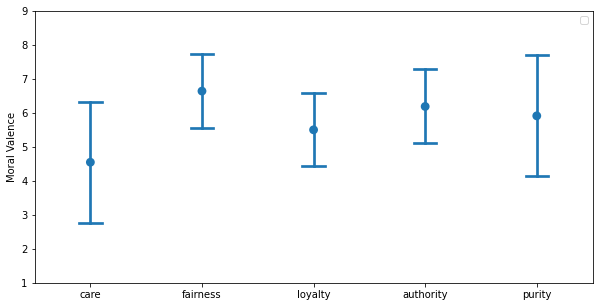

In [69]:
plt.figure(figsize=(10,5))
sns.pointplot(x =df_t_m.Morals, y= df_t_m.Value.astype(float), data = df_t_m,join=False, order = ['care', 'fairness', 'loyalty', 'authority', 'purity'] ,dodge=True, estimator=np.mean, capsize=.2,ci='sd')
plt.legend()
plt.ylim(1, 9)
plt.ylabel('Moral Valence')
plt.xlabel('')
plt.savefig('./../figs/reason/TotalMedianDifference.pdf',format='pdf', transparent=True)

In [70]:
gc.collect()

13816

In [71]:
df_meta.head()

title,summary,author,keywords,published_time,section,url,ID
Does 21 Save Lives?,Drinking ages and traffic fatalities,Jacob Sullum,NaN,2007-11-01T16:43:00+00:00,Posts,https://reason.com/2007/11/01/does-21-save-lives/,69ff8431206c0a7f85be88f881bf0c45
Flat-Bread Truck,Are capitalist robber barons conspiring to rui...,Brian Doherty,Antitrust,1997-08-01T04:00:00+00:00,Posts,https://reason.com/1997/08/01/flat-bread-truck/,bd5d11929e3259b0d7d467d3bca9a232
Thunder on the Center-Right,The Weekly Standard turns 10.,W. James Antle,Politics|Iraq|Media,2006-04-01T05:00:00+00:00,Posts,https://reason.com/2006/04/01/thunder-on-the-c...,ee997824355396272b3c67fe27752222
Curbing school cops,Elementary Abuse,Brian Doherty,Police in Schools,2010-03-21T23:44:00+00:00,Posts,https://reason.com/2010/03/21/curbing-school-c...,56d7fe14fb6b21fbdaf8265f3c363d25
The Perils of Global Libertarian Utopianism,THE STATE POSES the greatest threat to liberty...,Christopher Preble,NaN,2003-08-01T16:00:00+00:00,Posts,https://reason.com/2003/08/01/the-perils-of-gl...,fc0fa288f03bc1f88d82054c876b1128


In [97]:
df_meta.shape

(14130, 7)

### Comapre Reason with All sides on the common keywords

In [72]:
k = df_meta.keywords.dropna().str.split('|')

In [73]:
k = pd.DataFrame(k).reset_index()

In [74]:
keywords = np.unique([*itertools.chain.from_iterable(k.keywords)])

In [75]:
keywords

array(['10th Amendment', '14th Amendment', '1968', ..., 'tenure',
       'victims', 'wealth tax'], dtype='<U43')

In [77]:
keywords = pd.DataFrame(keywords)

In [163]:
keywords2check = keywords[keywords.iloc[:,0].isin(df_meta_all_sides['Tags:'].unique())]

In [164]:
keywords2check.rename(columns={0:"keywords"},inplace=True)

/home/kkalimeri/miniconda3/envs/cloneldaenv/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [179]:
for i in keywords2check.keywords.values:
    metafiles_to_retrieve = df_meta.keywords.filter(like=i, axis=0).index
    metafiles_id = df_meta.loc[metafiles_to_retrieve].ID.values
    d_scores = df_t[df_t.Text_ID.isin(metafiles_id)]
    moral_scores = d_scores.loc[:,['Text_ID','authority','care','fairness','loyalty','purity']].melt(id_vars=['Text_ID'], value_vars=['authority','care','fairness','loyalty','purity',],
    var_name='Morals', value_name='Value')
    fig = plt.figure(figsize=(10,5))
    try:
        sns.pointplot(x =moral_scores.Morals, y= moral_scores.Value, data = moral_scores,dodge=True,join=False, estimator=np.median, capsize=.2,order=['care', 'fairness', 'loyalty', 'authority', 'purity'])   
        plt.title(i)
        plt.ylabel('Moral Valence')
        plt.ylim(0, 9)
        plt.xlabel('')
        plt.savefig('./../figs/reason/Reason_'+str(i)+'.pdf',format='pdf', transparent=True)
        plt.close(fig)
    except:
        print(i)
        continue
    
    gc.collect()

Campaign Finance
Culture
Food
National Defense
Palestine
Science
South Korea
Taxes
Treasury


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [180]:
gc.collect()

117844